In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Задача 2
Предприятие выпускает покрышки и надувные лодки.
Производство одной покрышки занимает 2 часа на заготовительном участке, 4 часа на участке обработки, 0 часов на участке сборки.
Производство одной лодки занимает 6 часов на заготовительном участке, 3 часа на участке обработки, 2 часа на участке сборки.
Стоимость одной лодки — 12000 рублей, стоимость покрышки — 7000 рублей.
Фонд времени в день: заготовительного участка — 14 нормочасов, участка обработки — 10 нч, участка сборки — 8 нч.
Составить ЦФ, записать ограничения и функцию Лагранжа для решения этой задачи.
* Разработать оптимальный производственный план предприятия.

$F = 7000n_1+12000n_2,  n_1 - покрышки,   n_2 - лодки $<br>
$(n_1^*, n_2^*): F(n_1^*, n_2^*) = \max(F)$<br> <br>
Запишем ограничения по загрузке цехов исходя из того, что мы хотим максимизировать прибыль за день. <br>
$2n_1+6n_2 \leq 14$ - заготовительный участок<br>
$4n_1+3n_2 \leq 10$ - участков обработки<br>
$0n_1+2n_2 \leq 8$ - участок сборки <br>

$L(n_1,n_2,\lambda_1,\lambda_2, \lambda_3) = 7000n_1+12000n_2 + \lambda_1(2n_1+6n_2 - 14) + \lambda_2(4n_1+3n_2 - 10) + \lambda_3(2n_2 - 8) $<br>
получаем следующие уравления <br>
$7000 + 2\lambda_1 = 0$ <br>
$12000 + 3\lambda_2 + 2\lambda_3= 0$ <br>
$2n_1+6n_2 - 14 = 0$ <br>
$4n_1+3n_2 - 10 = 0 $ <br>
$2n_2 - 8 = 0$ <br> <br> 

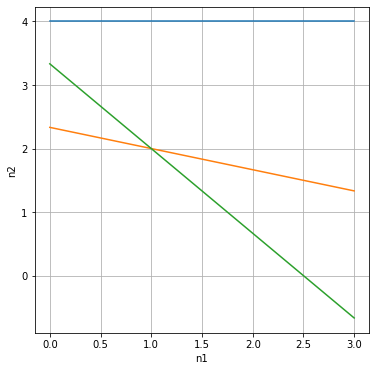

In [2]:
n1 = np.arange(0, 4, 1)
n2_1 = (8 + n1*0)/2
n2_2 = (14-n1*2)/6
n2_3 = (10-4*n1)/3

plt.figure(figsize=(6, 6))
plt.plot(n1, n2_1)
plt.plot(n1, n2_2)
plt.plot(n1, n2_3)
plt.xlabel('n1')
plt.ylabel('n2')
plt.grid()

Мы видим решения $n_1 = 1$ и $n_2 = 2$.  <br>
Таким образом чтобы максимизировать прибыль в день, нам нужно сделать 1 покрышку и 2 лодки. 
$F = 7000*1+12000*2 = 31 000$  <br>
Посмотрим на загруженность по участкам: <br>
$2 + 12 \leq 14$ - заготовительный участок<br>
$4+6 \leq 10$ - участков обработки<br>
$4 \leq 8$ - участок сборки <br>
Таким образом можно рекомандовать делать 1 покрышку и 2 лодки в день, а так же сократить фонд времени на участок сборки в два раза

#### Задача 1
Директор выделил машину под закупку оборудования, выделил достаточно большое количество денег и сказал: «Берите, что вам нужно, но не более 200 кг. И каждого товара берите не более одной единицы!» Есть прайс-лист на 2000 наименований.
Стоимости товаров варьируются от 100 до 5000 с шагом 100.
Массы товаров варьируются от 1 до 150 кг с шагом в 1 кг.
Зависимостей между массой и стоимостью нет (может выпасть товар массой 1 кг и стоимостью 5000 и массой 150 кг и стоимостью 100.
Необходимо составить ЦФ для этой задачи, выбрать критерий оптимальности и...
* ...предложить алгоритм её решения

Мы будем решать следующий вариант: мы ходим максимально заполнить нашу машину, при этом потратить минимальное количество денег. <br>
$i$ - позиция в прайсе, от 1 до 2000 <br>
$w_i$ - вес i-ой позиции <br>
$c_i$ - цена i-ой позиции <br>
$ x_{i} = \begin{cases} 1, если \space мы \space берем "i" товар\\
0, в\spaceпротивном\spaceслучае. \end {cases}$ <br>

Тогда получаем функции для оптимизации: <br>
$F_1 = \sum_{i=1}^{2000} c_{i} x_{i} \rightarrow min$ - хотим потратить минимум денег. Но мы потратим минимум денег, если ничего не купим <br>
$F_2  = \sum_{i=1}^{2000} w_{i} x_{i} \rightarrow max$ - при этом мы хотим максимально загрузить нашу машину <br><br>
$F = F_2 - F_1 \rightarrow max$ <br>
но так же мы имеем ограничение на вместительность: $\sum_{i=1}^{2000} w_{i} x_{i} \leq 200$

In [21]:
import pandas as pd

In [26]:
price = pd.DataFrame()
price['cost'] = [np.random.randint(1, 50)*100 for i in range(2000)]
price['weight'] = [np.random.randint(1, 150) for i in range(2000)]

In [28]:
price.head(3)

,cost,weight
0,3500,98
1,700,34
2,2100,120
